<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prelude" data-toc-modified-id="Prelude-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prelude</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualisation</a></span></li><li><span><a href="#Road-Network" data-toc-modified-id="Road-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Road Network</a></span><ul class="toc-item"><li><span><a href="#Roads" data-toc-modified-id="Roads-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Roads</a></span></li><li><span><a href="#Traffic-Lights" data-toc-modified-id="Traffic-Lights-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Traffic Lights</a></span></li><li><span><a href="#Intersections" data-toc-modified-id="Intersections-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Intersections</a></span></li><li><span><a href="#Road-Segments" data-toc-modified-id="Road-Segments-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Road Segments</a></span></li><li><span><a href="#Road-Network" data-toc-modified-id="Road-Network-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Road Network</a></span></li></ul></li><li><span><a href="#Vehicles" data-toc-modified-id="Vehicles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Vehicles</a></span></li><li><span><a href="#Recorder" data-toc-modified-id="Recorder-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recorder</a></span><ul class="toc-item"><li><span><a href="#Backup-and-Restore" data-toc-modified-id="Backup-and-Restore-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Backup and Restore</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Traffic-Lights" data-toc-modified-id="Traffic-Lights-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Traffic Lights</a></span><ul class="toc-item"><li><span><a href="#Test-Traffic-Lights" data-toc-modified-id="Test-Traffic-Lights-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Test Traffic Lights</a></span></li><li><span><a href="#Code-Traffic-Light-Crossing" data-toc-modified-id="Code-Traffic-Light-Crossing-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Code Traffic Light Crossing</a></span></li><li><span><a href="#Simulation-Traffic-Light-Crossing" data-toc-modified-id="Simulation-Traffic-Light-Crossing-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Simulation Traffic Light Crossing</a></span></li><li><span><a href="#Visualisation-Traffic-Light-Crossing" data-toc-modified-id="Visualisation-Traffic-Light-Crossing-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Visualisation Traffic Light Crossing</a></span></li><li><span><a href="#Statistics-Traffic-Light-Crossing" data-toc-modified-id="Statistics-Traffic-Light-Crossing-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Statistics Traffic Light Crossing</a></span><ul class="toc-item"><li><span><a href="#Traffic-Density-in-veh/km" data-toc-modified-id="Traffic-Density-in-veh/km-6.1.5.1"><span class="toc-item-num">6.1.5.1&nbsp;&nbsp;</span>Traffic Density in veh/km</a></span></li><li><span><a href="#Traffic-Flow-in-veh/h" data-toc-modified-id="Traffic-Flow-in-veh/h-6.1.5.2"><span class="toc-item-num">6.1.5.2&nbsp;&nbsp;</span>Traffic Flow in veh/h</a></span></li><li><span><a href="#Average-Travelling-Time-in-s" data-toc-modified-id="Average-Travelling-Time-in-s-6.1.5.3"><span class="toc-item-num">6.1.5.3&nbsp;&nbsp;</span>Average Travelling Time in s</a></span></li><li><span><a href="#Average-Speed-in-km/h" data-toc-modified-id="Average-Speed-in-km/h-6.1.5.4"><span class="toc-item-num">6.1.5.4&nbsp;&nbsp;</span>Average Speed in km/h</a></span></li><li><span><a href="#Average-and-Maximum-Wait-Time-in-s" data-toc-modified-id="Average-and-Maximum-Wait-Time-in-s-6.1.5.5"><span class="toc-item-num">6.1.5.5&nbsp;&nbsp;</span>Average and Maximum Wait Time in s</a></span></li><li><span><a href="#Maximum-Queue-Length" data-toc-modified-id="Maximum-Queue-Length-6.1.5.6"><span class="toc-item-num">6.1.5.6&nbsp;&nbsp;</span>Maximum Queue Length</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
VERSION = '43'

# Prelude

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random

import simpy

In [3]:
def isNearZero(x, ε = 0.00001):
    return abs(x)<ε

In [4]:
class SimulationAborted(Exception):
    def __init__(self, cause):
        self.cause = cause
    def getCause(self):
        return self.cause
    
try:
    raise SimulationAborted("Fatal Error")
except SimulationAborted as e:
    print(e.getCause())

Fatal Error


# Visualisation

[TOC](#Table-of-Contents)

This section provides two methods: 

`displayMap` takes a Network as parameter and creates a visual representation of the road network. This is useful to test
the layout of a road network.

`animate` takes two parameters: a recorder and a filename. After running a simulation it extracts the data from the recorder and creates an animated gif file of the 
simulation. 

The code given below can be safely ignored.

In [5]:
def createBackground(nw):

        idata = np.zeros( (nw.height,nw.width,3), dtype=np.uint8 )

        darkgreen =  (0, 128, 0)     # "darkgreen" 
        darkgray =   (80, 80, 80)    # "darkgray"
        dirtywhite = (250, 250, 250) # "white" 
        dirtyblack = (20, 20, 20)    # "black"
        
        def fill(x0, x1, y0, y1, c):
            nonlocal idata
            for x in range(x0, x1+1):
                for y in range(y0, y1+1):
                    for i in range(3):
                        # idata[y,x,i] = c[i]
                        idata[nw.height-1-y,x,i] = c[i]
            # plt.fill_between([x0, x1], [y0, y0], [y1, y1], color=c)
        
        def green(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, darkgreen)
        def gray(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, darkgray)
        def white(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, dirtywhite)
        def black(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, dirtyblack)
        def tl_red(x0, y0):
            fill(x0, x0+1, y0, y0+1, (255,0,0))
        def tl_green(x0, y0):
            fill(x0, x0+1, y0, y0+1, (0,255,0))
        def tl_yellow(x0, y0):
            fill(x0, x0+1, y0, y0+1, (255,255,0))
        
        def dline(x0, x1, y0, y1):
            nonlocal idata
            if y0==y1:  # horizontal line
                for x in range(x0, x1+1):
                    if (x//4)%2==0:
                        for i in range(3):
                            idata[nw.height-1-y0, x, i] = dirtywhite[i]  
            elif x0==x1: # vertical line:
                for y in range(y0, y1+1):
                    if (y//4)%2==0:
                        for i in range(3):
                            idata[nw.height-1-y, x0, i] = dirtywhite[i]  
        
        def fline(x0, x1, y0, y1):
            nonlocal idata
            if y0==y1:  # horizontal line
                for x in range(x0, x1+1):
                    for i in range(3):
                        idata[nw.height-1-y0, x, i] = dirtywhite[i]
            elif x0==x1: # vertical line:
                for y in range(y0, y1+1):
                    for i in range(3):
                        idata[nw.height-1-y, x0, i] = dirtywhite[i]
            else:
                raise ValueError("Illegal fline")
                
        green(0, nw.width-1, 0, nw.height-1)
        LW = nw.LW
        SL = nw.SL
        
        for X in nw.intersections.values():
            if not X.crossRoadIsThroughRoad(EAST) and \
                    not X.crossRoadIsThroughRoad(NORTH):
                gray(X.x-LW, X.x+LW, X.y-LW, X.y+LW)  
                        
        for r in nw.getRoads(NORTH_SOUTH):
                    for s in r.segments:
                            begin = nw.height-1 if s.begin is None else s.begin.y-LW
                            end = 0 if s.end is None else s.end.y+LW
                            gray(r.x-LW, r.x+LW, end, begin)
                            center = (begin+end)//2
                            if s.giveWaySOUTH:
                                dline(r.x, r.x, end+SL, center)
                                fline(r.x, r.x, end+1, end+SL)
                                white(r.x, r.x+LW, end+1, end+2)
                            else:
                                dline(r.x, r.x, end, center)
                            if s.giveWayNORTH:
                                dline(r.x, r.x, center, begin-SL)
                                fline(r.x, r.x, begin-SL, begin)
                                white(r.x-LW, r.x, begin-1, begin)                               
                            else:
                                dline(r.x, r.x, center, begin)

        for r in nw.getRoads(EAST_WEST):
                    for s in r.segments:
                            begin = nw.width-1 if s.begin is None else s.begin.x-LW
                            end = 0 if s.end is None else s.end.x+LW
                            gray(end, begin, r.y-LW, r.y+LW)
                            center = (begin+end)//2
                            if s.giveWayWEST:
                                dline(end+SL, center, r.y, r.y)
                                fline(end+1, end+SL, r.y, r.y)
                                white(end+1, end+2, r.y-LW, r.y)
                            else:
                                dline(end, center, r.y, r.y)
                            if s.giveWayEAST:
                                dline(center, begin-SL, r.y, r.y)
                                fline(begin-SL, begin, r.y, r.y)
                                white(begin-1, begin, r.y, r.y+LW)                               
                            else:
                                dline(center, begin, r.y, r.y)    
        
        for ns in nw.getRoads(NORTH_SOUTH):
            for ew in nw.getRoads(EAST_WEST):
                intersection = nw.getIntersection(ns, ew)
                TL = intersection.getTrafficLight()
                if TL is not None:
                    x = intersection.x
                    y = intersection.y
                    LW = nw.LW
                    tla=1
                    tlb=2
                    tlo=LW+3    # TL distance from road
                    tlw=tlo+3   # TL width out
                    tlh=tlo+9  # TL height out
                    black(x+tlo, x+tlh, y-tlw, y-tlo) # West-bound
                    tl_red(x+tlo+tla, y-tlo-tlb)
                    tl_yellow(x+tlo+tla+3, y-tlo-tlb)
                    tl_green(x+tlo+tla+6, y-tlo-tlb)
                    
                    black(x-tlh, x-tlo, y+tlo, y+tlw) # East-bound
                    tl_red(x-tlo-tlb, y+tlo+tla)
                    tl_yellow(x-tlo-tlb-3, y+tlo+tla)
                    tl_green(x-tlo-tlb-6, y+tlo+tla)
                    
                    black(x-tlw, x-tlo, y-tlh, y-tlo) # North-bound
                    tl_red(x-tlo-tlb, y-tlo-tlb)
                    tl_yellow(x-tlo-tlb, y-tlo-tlb-3)
                    tl_green(x-tlo-tlb, y-tlo-tlb-6)
                    
                    black(x+tlo, x+tlw, y+tlo, y+tlh) # South-bound
                    tl_red(x+tlo+tla, y+tlo+tla)
                    tl_yellow(x+tlo+tla, y+tlo+tla+3)
                    tl_green(x+tlo+tla, y+tlo+tla+6)
        return idata

In [6]:
from PIL import Image

def displayMap(nw):
        # was formerly a method in class network
        idata = createBackground(nw)
            
        res = 100 # [dpi]
        fig = plt.figure(dpi=res)
        fig.set_figwidth(1.32*nw.width/res-0.226)
        fig.set_figheight(1.32*nw.height/res-0.226)
    
        ax = plt.gca()
        ax.axis('off')
    
        plt.xlim(0, nw.width-1)
        plt.ylim(0, nw.height-1)

        def flatten(l):
            return [ (r,g,b) for row in l for [r,g,b] in row ]
        
        img = Image.new('RGB', (nw.width, nw.height))
        img.putdata(flatten(idata.tolist()))
        img2=img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
        plt.imshow(img2)

In [7]:
from matplotlib.animation import FuncAnimation
import copy
from PIL import Image
       
       
def animate(rec, filename, start_time=None, end_time=None):
    
    filename += "_"+VERSION+".gif"

    background = createBackground(rec.network)
    
    data = rec.getData()
    timerevents = data[data['event']=='timer']
    tf = data[data['event']=='trafficlight']
    dropcols = ['s','v','a','id','event','ql']
    tf = tf.drop(columns=dropcols)
    trafficlights = list(tf.rd.unique())
    
    # vehicle visualisation size parameter
    VL = rec.network.VL   # lengt
    VW = rec.network.VW   # width
    
    height = rec.network.height
    width = rec.network.width
    
    brightWhite = (255, 255, 255)
    darkBlue = (0, 0, 180)
    darkRed = (180, 0, 0)
    darkgreen = (0, 200, 0)
    orange = (200, 120, 0)
    black = (0, 0, 0)
    darkGray = (50, 50, 50)
    
    def flatten(l):
        return [ (r,g,b) for row in l for [r,g,b] in row ]

    def fill(idata, x0, x1, y0, y1, c):
        
        for x in range(max(x0,0), min(x1+1,width)):
            for y in range(max(y0,0), min(y1+1,height)):
                for i in range(3):
                    idata[height-1-y,x,i] = c[i]
    
    def vehicle(idata, x, y, direction, color):
        
        VW = rec.network.VW
        VL = rec.network.VL
        x = int(round(x,0))
        y = int(round(y,0))
        
        if color=='red':
            color = darkRed
        elif color=='blue':
            color = darkBlue
        elif color=='green':
            color = darkgreen
        elif color=='black':
            color = black
        elif color=='orange':
            color = orange
        else:
            raise ValueError('undefined color:', color)
        
        if direction=='SOUTH':
            fill(idata, x-VW//2, x+VW//2, y, y+VL-1, color)
            fill(idata, x-VW//2, x-VW//2, y, y, brightWhite)
            fill(idata, x+VW//2, x+VW//2, y, y, brightWhite)

        elif direction=='NORTH':
            fill(idata, x-VW//2, x+VW//2, y-VL+1, y, color)
            fill(idata, x+VW//2, x+VW//2, y, y, brightWhite)
            fill(idata, x-VW//2, x-VW//2, y, y, brightWhite)
            
        elif direction=='EAST':
            fill(idata, x-VL+1, x, y-VW//2, y+VW//2, color)
            fill(idata, x, x, y+VW//2, y+VW//2, brightWhite)
            fill(idata, x, x, y-VW//2, y-VW//2, brightWhite)
            
        elif direction=='WEST':
            fill(idata, x, x+VL-1, y-VW//2, y+VW//2, color)
            fill(idata, x, x, y+VW//2, y+VW//2, brightWhite)
            fill(idata, x, x, y-VW//2, y-VW//2, brightWhite)
            
        else:
            raise ValueError('illegal direction')
        
    def trafficLight(idata, x, y, direction, color):
        
        def off(x0, y0):
            fill(idata, x0, x0+1, y0, y0+1, darkGray)
            
        x = int(round(x,0))
        y = int(round(y,0))
        LW = rec.network.LW
        tla=1
        tlb=2
        tlo=LW+3    # TL distance from road
        tlw=tlo+3   # TL width out
        tlh=tlo+9  # TL height out
        if direction==EAST_WEST:            
            if color!=RED:
                off(x+tlo+tla, y-tlo-tlb)   # West-bound
                off(x-tlo-tlb, y+tlo+tla)   # East-bound
            if color!=YELLOW:
                off(x+tlo+tla+3, y-tlo-tlb) # West-bound
                off(x-tlo-tlb-3, y+tlo+tla) # East-bound
            if color!=GREEN:
                off(x+tlo+tla+6, y-tlo-tlb) # West-bound
                off(x-tlo-tlb-6, y+tlo+tla) # East-bound
        elif direction==NORTH_SOUTH:          
            if color!=RED:
                off(x-tlo-tlb, y-tlo-tlb)   # North-bound
                off(x+tlo+tla, y+tlo+tla)   # South-bound
            if color!=YELLOW:
                off(x-tlo-tlb, y-tlo-tlb-3) # North-bound
                off(x+tlo+tla, y+tlo+tla+3) # South-bound
            if color!=GREEN:
                off(x-tlo-tlb, y-tlo-tlb-6) # North-bound
                off(x+tlo+tla, y+tlo+tla+6) # South-bound     
        
    def snapshot(t):

        # get a fresh copy of the background image
        idata = copy.deepcopy(background)
        print('.', end='')
        
        for tl in trafficlights:
            tfl = tf[tf.rd==tl]
            tx = tfl.x.min()
            ty = tfl.y.min()
            directions = list(tfl.dir.unique())
            for direction in directions:
                tfd = tfl[tfl.dir==direction]
                lastT = tfd.t[tfd.t<=t].max()
                color = list(tfd.col[tfd.t==lastT])[0]
                trafficLight(idata, tx, ty, direction, color)
 
        current = timerevents[timerevents['t']==t]
        vehicles = list(current['id'])
        for id in vehicles:
            v = current[current['id']==id]
            x = v['x'].values[0]
            y = v['y'].values[0]
            d = v['dir'].values[0]
            c = v['col'].values[0]
            vehicle(idata, x, y, d, color=c)
        

        img = Image.new('RGB', (width, height))
        # note flatten is the slowest operation 
        # it takes about 90% of the execution time of
        # snapshot, around 60ms. However animation
        # framework takes about 500ms per snapshot
        img.putdata(flatten(idata.tolist()))
        img2=img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
        plt.imshow(img2)
 
    res = 120 # [dpi]
    fig = plt.figure(dpi=res, frameon=False)
    fig.set_figwidth(width//res)
    fig.set_figheight(height//res)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    plt.xlim(0, width-1)
    plt.ylim(0, height-1)
    
    if start_time is None:
        start_time = rec.startTime # timerevents['t'].min()
        
    if end_time is None:
        end_time = rec.stopTime # timerevents['t'].max()
        
    Δt = rec.timeStep
    
    times = np.arange(start_time, end_time+Δt/2, Δt)
    
    # interval: update frequency in milliseconds
    anim = FuncAnimation(fig, snapshot, repeat=True, repeat_delay=2000, 
                         frames=times,       
                         interval=100) 
                
    # extra args control how often the animation should be looped extra_args=['-loop','-1']
    anim.save(filename, dpi=300, writer='imagemagick')
    
    print('done')

# Road Network

[TOC](#Table-of-Contents)

A National Road goes straight in North-South direction through a town. It divides the town in two parts, the eastern Old Town and the western New Town. 

- `St` for Street going in North-South direction
- `Rd` for Roads going in East-West direction
- `Bd` for Border denoting the limits of the drawing area
- `N`, `S`, `E`, `W`, `M` stands for North, South, East, West and Main
- Streets and Roads have two lanes marked by their direction:
`WSt_Nbd` describes the North bound lane of West Street
- Intersections are described by adding `x` and the name of the crossing street or road and an `i` or `o` indicating the point of entering *into* or coming *out of* the crossing, like `WSt_Nbd_xNRd_i`

In [8]:
# Global constants indicating main directions

NORTH = "NORTH"
SOUTH = "SOUTH"
EAST = "EAST"
WEST = "WEST"

NORTH_SOUTH = 'NORTH-SOUTH'
EAST_WEST = 'EAST-WEST'

def left(direction):
    if direction is NORTH:
        return WEST
    elif direction is SOUTH:
        return EAST
    elif direction is EAST:
        return NORTH
    elif direction is WEST:
        return SOUTH
    else:
        raise ValueError("illegal direction: "+direction)
        
def right(direction):
    return opposite(left(direction))
        
def cross(direction):
    if direction is NORTH_SOUTH:
        return EAST_WEST
    elif direction is EAST_WEST:
        return NORTH_SOUTH
    else:
        raise ValueError("illegal direction: "+direction)
        
def opposite(direction):
    if direction is NORTH:
        return SOUTH
    elif direction is SOUTH:
        return NORTH
    elif direction is EAST:
        return WEST
    elif direction is WEST:
        return EAST
    else:
        raise ValueError("illegal direction: "+direction)
        
def mainDirection(direction):
    if direction is NORTH or direction is SOUTH:
        return NORTH_SOUTH
    elif direction is EAST or direction is WEST:
        return EAST_WEST
    else:
        raise ValueError("illegal direction: "+direction)

In [9]:
# Global constants indicating relative directions
LEFT = "LEFT"
RIGHT = "RIGHT"

def look(leftOrRight, direction):
    if leftOrRight is LEFT:
        return left(direction)
    elif leftOrRight is RIGHT:
        return right(direction)
    else:
        raise ValueError("unexpected: "+leftOrRight)

Testing the above code:

## Roads

In [10]:
class Road:
    def __init__(self, network, name, shortName, direction, coord):
        
        global NORTH_SOUTH, EAST_WEST
        
        self.network = network
        self.name = name
        self.shortName = shortName
        self.segments = []
        if direction == NORTH_SOUTH:
            self.direction = NORTH_SOUTH
            self.x = int(round(coord*network.width, 0))
            self.y = None
            self.length = network.height
        elif direction == EAST_WEST:
            self.direction = EAST_WEST
            self.x = None
            self.y = int(round(coord*network.height, 0))
            self.length = network.width
        else:
            raise ValueError('illegal Road direction: '+direction)
        network.roads.append(self)
            
    def __str__(self):
        return self.name
    
    def getName(self):
        return self.name
    
    def getShortName(self):
        return self.shortName
    
    def getX(self):
        if self.x is not None:
            return self.x
        else:
            raise ValueError('illegal coordinate for: ', self.direction)
            
    def getY(self):
        if self.y is not None:
            return self.y
        else:
            raise ValueError('illegal coordinate for: ', self.direction)
            
    def addSegment(self, segment):
        self.segments.append(segment)
        
    def getRoadSegment(self, x, y):
        for s in self.segments:
            if s.contains(x, y):
                return s
        return None
    
    def getLength(self):
        return self.length
    
    def getIntersection(self, r):
        return self.network.getIntersection(self, r)
    
    def getCrossRoads(self):
        return self.network.getRoads(cross(self.direction))
        
    def getIntersections(self):
        return [ self.getIntersection(r) 
                    for r in self.getCrossRoads() ]
    
    def getIntersectionPoints(self):
        intersections = self.getIntersections()
        if self.direction is NORTH_SOUTH:
            return [ i.y for i in intersections]
        else:  # EAST_WEST
            return [ i.x for i in intersections]
        
    def freeDist(self, direction, r):
        intersection = self.getIntersection(r)
        queueLength = intersection.getQueueLength(direction)
        s = intersection.stop(direction, queueLength)
        if self.direction is NORTH_SOUTH:
            y = s[1] if direction==NORTH else self.length-s[1]
            return y
        else:
            x = s[0] if direction==EAST else self.length-s[0]
            return x
        
    def freeDistance(self, direction):
        crossRoads = self.getCrossRoads()
        distances = [ self.freeDist(direction, r) 
                        for r in crossRoads ]
        return min(distances)
    
    def getVehicles(self, direction):
        acc = []
        for v in self.network.rec.vehicles:
            if v.road==self and v.direction==direction:
                acc.append(v)
        return acc

## Traffic Lights

In [11]:
RED = "RED"
YELLOW = "YELLOW"
GREEN = "GREEN"


class TrafficLight:
    def __init__(self, intersection, NS=[6,2] , EW=[3,2]):
        self.name = intersection.name
        self.NS_green = NS[0]  # timinig of green in NS direction
        self.NS_yellow = NS[1] # timinig of yellow in NS direction
        self.EW_green = EW[0]
        self.EW_yellow = EW[1]
        self.intersection = intersection
        self.intersection.setTrafficLight(self)
        self.rec = intersection.network.rec
        if self.rec is not None:
            self.rec.env.process(self.process())
            
    def getName(self):
        return self.name
    
    def process(self):
        while True:
            
            self.NS, self.EW = RED, GREEN
            self.rec.recordTrafficLight(self, NORTH_SOUTH, RED)
            self.rec.recordTrafficLight(self, EAST_WEST, GREEN)
            yield self.rec.env.timeout(self.EW_green)
            
            self.NS, self.EW = RED, YELLOW
            self.rec.recordTrafficLight(self, EAST_WEST, YELLOW)
            yield self.rec.env.timeout(self.EW_yellow)
            
            self.NS, self.EW = GREEN, RED
            self.rec.recordTrafficLight(self, NORTH_SOUTH, GREEN)
            self.rec.recordTrafficLight(self, EAST_WEST, RED)
            yield self.rec.env.timeout(self.NS_green)
            
            self.NS, self.EW = YELLOW, RED
            self.rec.recordTrafficLight(self, NORTH_SOUTH, YELLOW)
            yield self.rec.env.timeout(self.NS_yellow)
            
    def getColor(self, direction):
        if direction is NORTH_SOUTH:
            return self.NS
        elif direction is EAST_WEST:
            return self.EW
        else:
            raise ValueError("illegal direction: "+direction)

## Intersections

In [12]:
class Intersection:
    def __init__(self, network, rNS, rEW):
        self.name = rNS.name + ' x ' + rEW.name
        self.rNS = rNS
        self.rEW = rEW
        self.x = rNS.x
        self.y = rEW.y
        self.network = network
        self.NE = None
        self.NW = None
        self.SE = None
        self.SW = None 
        self.queues = { NORTH: None, EAST: None, SOUTH: None, WEST: None }
        self.spots = { NORTH: [], EAST: [], SOUTH: [], WEST: [] }
        self.trafficLight = None
        self.env = None
        if self.network.rec is not None:
            self.env = self.network.rec.env
        self.bold = None
        if self.env is not None:
            self.env.process(self.spin())
            
   
    def __str__(self):
        return self.name
    
    def getId(self):
        return self.id
    
    def setTrafficLight(self, trafficLight):
        self.trafficLight = trafficLight
        
    def getTrafficLight(self):
        return self.trafficLight
    
    def centrePoint(self):
        return (self.x, self.y)
    
    def crossRoad(self, incomingDirection):
        if incomingDirection is NORTH or \
                incomingDirection is SOUTH:
            return self.rEW
        else:
            return self.rNS
        
    def crossRoadIsThroughRoad(self, incomingDirection):
        road = self.crossRoad(incomingDirection)
        for s in road.segments:
            if s.begin==self or s.end==self:
                return False
        return True
                
    def getQueueLength(self, incomingDirection):
        queue = self.queues[incomingDirection]
        if queue is None:
            env = self.network.rec.env
            queue = simpy.Resource(env, capacity=1)
            self.queues[incomingDirection] = queue
        return len(queue.queue)
        
    def request(self, incomingDirection):
        env = self.network.rec.env
        queue = self.queues[incomingDirection]
        spots = self.spots[incomingDirection]
        if queue is None:
            queue = simpy.Resource(env, capacity=1)
            self.queues[incomingDirection] = queue
        request = queue.request()
        if len(queue.queue)>=len(spots):
            spots += [ simpy.Resource(env, capacity=1) ]
            self.spots[incomingDirection] = spots
            
        if len(queue.queue)>=self.network.MAX_QUEUE_LENGTH:
            message = f"at t={env.now:7.3f}s Queue Overflow at "+self.name+ \
                        " ("+incomingDirection+")"
            raise SimulationAborted(message)
            
        return request
    
    def release(self, incomingDirection, request):
        queue = self.queues[incomingDirection]
        queue.release(request)
        
    def getSpotRequest(self, incomingDirection, pos):
        env = self.network.rec.env
        spots = self.spots[incomingDirection]
        while pos>=len(spots):
            spots += [ simpy.Resource(env, capacity=1) ]
            self.spots[incomingDirection] = spots
        request = spots[pos].request()
        return request
        
    def releaseSpot(self, incomingDirection, pos, request):
        spots = self.spots[incomingDirection]
        spots[pos].release(request)
        
    def stop(self, incomingDirection, queueLength):
        LW = self.network.LW
        dist = LW+4
        if incomingDirection is NORTH:
            return (self.x+LW/2, self.y-(queueLength+1)*dist)
        elif incomingDirection is SOUTH:
            return (self.x-LW/2, self.y+(queueLength+1)*dist)
        elif incomingDirection is EAST:
            return (self.x-(queueLength+1)*dist, self.y+LW/2)
        elif incomingDirection is WEST:
            return (self.x+(queueLength+1)*dist, self.y-LW/2)
        
    def isDeadLocked(self):
        all = [NORTH, EAST, SOUTH, WEST]
        return min([ self.getQueueLength(dir) for dir in all ])>0
    
    def spin(self):
        while self.trafficLight is None:
            self.bold = None
            yield self.env.timeout(2)
            self.bold = random.sample([NORTH, EAST, SOUTH, WEST],1)[0]
            yield self.env.timeout(5)
           
    def isBold(self, direction):
        return self.bold is direction

## Road Segments

In [13]:
class RoadSegment:
    def __init__(self, road, begin, end):      
        if road.direction==NORTH_SOUTH:
            self.direction = SOUTH
            self.giveWayNORTH = begin is not None
            self.giveWaySOUTH = end is not None
        elif road.direction==EAST_WEST:
            self.direction = WEST
            self.giveWayEAST = begin is not None
            self.giveWayWEST = end is not None
        self.road = road
        self.begin = road.network.getIntersection(road, begin)
        self.end = road.network.getIntersection(road, end)
        self.name = road.name + "(" + self.direction + ") ["+str(begin)+","+str(end)+"]"
        road.addSegment(self)

    def __str__(self):
        return self.name
    
    def contains(self, x, y):
        if self.road.direction is NORTH_SOUTH:
            return min(begin.y, end.y) <= y <= max(begin.y, end.y) and \
                    self.road.x-LW <= x <= self.road.x+LW
        elif self.road.direction is EAST_WEST:
            return min(begin.x, end.x) <= x <= max(begin.x, end.x) and \
                    self.road.y-LW <= y <= self.road.y+LW
        else:
            raise ValueError('Illegal direction:', self.road.name)

## Road Network

In [14]:
class RoadNetwork:
    def __init__(self, name, width, height, rec=None):
        self.rec = rec
        if rec is not None:
            rec.network = self
        self.name = name
        self.width = width
        self.height = height
        self.roads = []
        self.intersections = dict()
        self.background = None
            
        self.LW = 8  # [m] lane width
        self.SL = 40 # [m] length of keep clear line near crossing
        self.VL = 10 # [m] enlarged length of a vehicle
        self.VW = 4  # [m] enlarged width of a vehicle
        
        self.MAX_QUEUE_LENGTH = (max(width, height)-50)/12 # for testing only
        
    def addRoad(self, name, shortName, direction, coord):
        for r in self.roads:
            if name in [r.getName(), r.getShortName()]:
                raise ValueError("Road name re-used: ", name)
            if shortName in [r.getName(), r.getShortName()]:
                raise ValueError("Road name re-used: ", shortName)
        r = Road(self, name, shortName, direction, coord)
        return r
        
    def getRoads(self, direction):
        return [ r for r in self.roads if r.direction is direction ]
    
    def getRoad(self, name):
        for r in self.roads:
            if r.name == name  or r.shortName == name:
                return r
        return None

    def getIntersection(self, r1, r2):
        if r1 is None or r2 is None:
            return None
        if type(r1) is str:
            r1 = self.getRoad(r1)
        if type(r2) is str:
            r2 = self.getRoad(r2)
        if r1.network is not self or r2.network is not self:
            raise ValueError('intersection roads from different networks')
        rNS, rEW = (r1, r2) if r1.direction is NORTH_SOUTH else (r2, r1)
        if rNS.direction is not NORTH_SOUTH or \
                rEW.direction is not EAST_WEST:
            raise ValueError('problem with intersection:', rNS.name, rEW.name)
        name = rNS.name + ' x ' + rEW.name  
        if name not in self.intersections:
            intersection = Intersection(self, rNS, rEW)
            self.intersections[name] = intersection
        return self.intersections[name]
    
    def getIntersectionByName(self, name):
        if name in self.intersections:
            return self.intersections[name]
        else:
            return None

# Vehicles

[TOC](#Table-of-Contents)

In [15]:
# emergency brake decelleration
#   Tesla:   -8.0 m/s²
#   normal:  -4.0 m/s²  
A_BRAKE = -4.0 # [m/s²]   

# average decelleration when using engine braking
#   Tesla:   -1.8 m/s²   (regenerative braking)
#   default: -0.6 m/s²
A_COAST = -0.6 # [m/s²]    

# max accelleration depending on car class
#   Tesla:   4.6 m/s²
#   default: 2.5 m/s² corresponds to 0-100km/h om 11s
A_MAX =  2.5 # [m/s²]   

In [16]:
class Vehicle:
    
    def __init__(self, rec, road, direction,
                 t0=0, v=0, a=0, vmax=None, 
                 color='red', plan=None):
        
        # the simulation wide vehicle registry is
        # anchored in the recorder
        self.id = rec.register(self)
        
        self.a_brake = A_BRAKE
        self.a_coast = A_COAST
        self.a_max = A_MAX

        self.length = rec.network.VL # [m]  Length of the vehicle 
        
        self.nomore_tolerance = 2 # [s]
        self.time_tolerance = 5 # [s]
        
        ## if not None the preferred max free velocity
        self.vmax = vmax
        self.color = color
        self.plan = plan
        
        self.env = rec.env
        self.rec = rec

        self.t0 = t0
        self.road = road

        # self.x0 and self.y0 [m] specify the position of the
        # reference point in the front center of the vehicle 
        if direction==SOUTH: 
            self.direction = SOUTH
            self.cos𝜑, self.sin𝜑 = 0, -1
            self.x0 = road.x+rec.network.LW//2
            self.y0 = rec.network.height-1

        elif direction==NORTH:
            self.direction = NORTH
            self.cos𝜑, self.sin𝜑 = 0, +1
            self.x0 = road.x-rec.network.LW//2
            self.y0 = 0  

        elif direction==EAST:
            self.direction = EAST
            self.cos𝜑, self.sin𝜑 = +1, 0
            self.x0 = 0
            self.y0 = road.y+rec.network.LW//2

        elif direction==WEST:
            self.direction = WEST
            self.cos𝜑, self.sin𝜑 = -1, 0
            self.x0 = rec.network.width-1
            self.y0 = road.y-rec.network.LW//2
        
        else:
            raise ValueError("illegal direction", direction)

        self.startPoint = (self.x0, self.y0)
        self.dx0, self.dy0 = v*self.cos𝜑, v*self.sin𝜑
        self.ddx0, self.ddy0 = a*self.cos𝜑, a*self.sin𝜑
         
        self.stopQueueReq = None  # request object for queueing at stop
        self.positionInQueue = None
        self.spotQueueReq = None # request for position in queue
        
        # trace flags
        self.traceEvents = False
        self.traceCrossing = False
        self.traceAdjustVelocity = False
        self.traceCruising = False
        self.traceInterrupt = False
        self.traceBraking = False
 
        self.t_target = []
        self.v_target = []
        
        # start process
        self.aborted = False
        self.running = False
                
        # Flags used for temporarily exclusive behaviour
        # This flag is used to prevent interrupting
        # braking for short distance moving
        
        self.braking = False
        self.moving = False
        # exclusive for stopping/crossing at intersection
        self.stopping = False
        self.patience = None
                   
        self.processRef = None
        self.mainProcessRef = None
        self.env.process(self.encapsulatedProcess())
  
    def __str__(self):
        return f"v{self.id:d}"
    
    def abort(self, cause=None):
        if not self.aborted:
            if cause is not None:
                print(cause)
            self.aborted = True
            self.running = False
            if cause is None:
                if self.mainProcessRef is not None and \
                        self.mainProcessRef.is_alive:
                    self.mainProcessRef.interrupt('Killing')

            
    def encapsulatedProcess(self):
        self.mainProcessRef = self.env.process(self.process())
        try:
            yield self.mainProcessRef
            self.mainProcessRef = None
        except SimulationAborted as exp:
            self.mainProcessRef = None
            self.abort(exp.getCause())
            self.rec.abort()
        except simpy.Interrupt:
            pass        
                    
    def trace(self, message):
        print(f"t={self.t0:5,.1f}s "
              f"x={self.x0:5,.1f}m y={self.y0:5,.1f}m "
              f"v={self.v():4.1f}m/s v{self.id:02d} "
              f"on {self.road.shortName:s}[{self.direction[0]:s}]", 
              message)
   
    def Δs(self, P=None):
        if P is None:
            P = self.startPoint
        return math.sqrt((self.x0-P[0])**2+(self.y0-P[1])**2)
        
    def setV(self, v):
        self.dx0, self.dy0 = v*self.cos𝜑, v*self.sin𝜑
        
    def v(self):
        return math.sqrt(self.dx0**2+self.dy0**2)
    
    def Δv(self, other):
        return math.sqrt((self.dx0-other.dx0)**2+(self.dy0-other.dy0)**2)
    
    def setA(self, a):
        self.ddx0, self.ddy0 = a*self.cos𝜑, a*self.sin𝜑
        
    def a(self):
        return self.ddx0/self.cos𝜑 if self.cos𝜑!=0 else self.ddy0/self.sin𝜑
    
    # compute distance to the car in front
    # i.e. distance between the front bumpers of both
    # vehicles minus the car length of the car in the front
    def dist(self, v):
        if v is None:
            return math.inf
        else:
            return self.Δs((v.x0, v.y0)) - v.length
    
    # returns the vehicle that is on the same road in the same
    # direction directly in front
    def vehicleInFront(self):
        other = None
        for v in self.rec.vehicles:
            if v is not self and v.road == self.road and \
                    v.direction == self.direction:
                if self.direction is NORTH and v.y0>self.y0:
                    if other is None or v.y0<other.y0: other = v                      
                elif self.direction is SOUTH and v.y0<self.y0:
                    if other is None or v.y0>other.y0: other = v                        
                elif self.direction is EAST and v.x0>self.x0:
                    if other is None or v.x0<other.x0: other = v                        
                elif self.direction is WEST and v.x0<self.x0:
                    if other is None or v.x0>other.x0: other = v                        
        return other
        
    # updates (vectorised) position and speed
    def update(self):
        t = self.env.now
        if t < self.t0 or not self.running:
            return False

        if t > self.t0:
            Δt = t - self.t0
            Δdx = self.ddx0*Δt
            Δdy = self.ddy0*Δt
            Δx = self.dx0*Δt + self.ddx0*Δt*Δt/2
            Δy = self.dy0*Δt + self.ddy0*Δt*Δt/2
            self.t0 = t 
            self.x0, self.y0 = self.x0+Δx, self.y0+Δy 
            self.dx0, self.dy0 = self.dx0+Δdx, self.dy0+Δdy
            
            # stop when leaving the area of the current network
            if self.x0<0 or self.x0>self.rec.network.width or \
                self.y0<0 or self.y0>self.rec.network.height:
                self.running = False

        return True
        
    # frequent periodic status check controlled by Recorder
    # triggers emergency action in the vehicle process
    def checkStatus(self):
        inFront = self.vehicleInFront()
        # if there is a vehicle in front which drives slower and
        # the distance to that vehicle in front is at current speed
        # less than the critical time tolerance of this driver
        if inFront is not None and \
                not self.braking and \
                not self.moving and \
                not self.stopping and \
                inFront.v() < self.v() and \
                self.dist(inFront)-self.length < self.time_tolerance*self.Δv(inFront): 
            # action is required
            # note that Δv is positive and self.a_coast is negative 
            Δv = self.Δv(inFront)
            Δs = self.dist(inFront)
            if -Δv**2/self.a_coast < Δs/2:
                Δt = -self.Δv(inFront)/self.a_coast
            else:
                Δt = -self.Δv(inFront)/self.a_brake
            self.setTarget(Δt, inFront.v())
     
    # allows setting of control parameters 
    # from an independent process
    def setTarget(self, t, v):
        self.t_target = [ t ] + self.t_target
        self.v_target = [ v ] + self.v_target
        self.interruptProcess()
      
    # defines the life cycle of a vehicle
    def process(self):

        # delay start to the given time t
        if self.t0>self.env.now:
            yield self.env.timeout(self.t0-self.env.now)

        while self.road.freeDistance(self.direction)<50:
            yield self.env.timeout(5)

        self.t0 = self.env.now
        if self.aborted:
            return
        self.running = True
        self.rec.startRecording(self)
        
        while self.update():

            inFront = self.vehicleInFront()
            
            # if the car in front is slower and we are a bit too near on its heals...
            if inFront is not None and \
                    not self.braking and not self.moving and \
                    inFront.v() < self.v() and \
                    self.dist(inFront)-self.length < \
                        self.nomore_tolerance*self.Δv(inFront):
                # inFront.trace(f"being followed v={inFront.v():4.1f}m/s a={inFront.a():1.2f}m/s² by v{self.id:d}")
                yield from self.emergencyBraking(inFront.v())
                if not isNearZero(self.v()-inFront.v()):
                    # after emergency breaking adjust to the speed of the car in front...
                    Δt = 1
                    self.setTarget(Δt, inFront.v())
                continue 
            
            elif len(self.t_target)>0:
                # normally len(self.t_target)<=1
                Δt = self.t_target[0]
                Δv = self.v_target[0]-self.v()
                self.t_target = self.t_target[1:]
                self.v_target = self.v_target[1:]
                if isNearZero(Δv):
                    yield from self.continueAtSameSpeed(Δt)
                else:
                    yield from self.adjustVelocity(Δv, Δt)


            if self.plan is not None and len(self.plan)>0:
                
                command = self.plan[0]
                
                # split action and position from command
                split = command.find('@')
                if 0 < split < len(command)-1:
                    action = command[:split]
                    position = command[split+1:] 
                else:
                    action = command
                    position = ""
                
                # split numeric parameters from action
                split1 = action.find('(')
                split2 = action.find(')')
                if 0 < split1 < split2:
                    params = action[split1+1:split2].split(',')
                    pars = [ float(p) for p in params ]
                    action = action[:split1]
                else:
                    pars = []

                
                if action == "Acc":
                    ## test action Acc(a,t)
                    self.setA(pars[0])
                    self.update()
                    yield self.env.timeout(pars[1])
                    # action completed
                    self.plan = self.plan[1:]
                    continue
                                
                if action == "Move":
                    ## test action Move(s)
                    yield from self.move(pars[0])
                    # action completed
                    self.plan = self.plan[1:]
                    continue
                    
                if action == "Wait":
                    ## test action Acc(a,t)
                    Δt = pars[0]
                    self.update()
                    # the car should be stationary
                    self.setA(0)
                    self.setV(0)
                    yield self.env.timeout(Δt)
                    self.update()
                    # action completed
                    self.plan = self.plan[1:]
                    continue          
                    
                if action == "Exit":
                    ## take vehicle out
                    self.running = False
                    # action completed
                    self.plan = self.plan[1:]
                    continue
                    
                if action == "Stop":
                    if len(pars)>0:
                        ## test action Stop(s)
                        Δs = pars[0]
                        yield from self.stop(Δs)
                        # action completed
                        self.plan = self.plan[1:]
                        continue
                    
                    if self.traceCrossing:
                        self.trace("action Stop")
                    intersection = self.road.getIntersection(position)
                    if intersection is None:
                        raise ValueError(f"unknown position {position:s}")
        
                    self.stopping = True
                    self.stopQueueReq = intersection.request(self.direction)
                    inFront = self.vehicleInFront()
                    if inFront is None or inFront.positionInQueue is None or \
                        self.dist(inFront)>self.Δs(intersection.centrePoint()):
                            self.positionInQueue = intersection.getQueueLength(self.direction)
                    else:
                        self.positionInQueue = inFront.positionInQueue+1
                    
                    self.spotQueueReq = intersection.getSpotRequest(self.direction, self.positionInQueue)
                    stopPoint = intersection.stop(self.direction, self.positionInQueue)
                    distance = self.Δs(stopPoint)
                    if self.traceCrossing:
                        self.trace(f"stopping at position {self.positionInQueue:d}")
                    yield from self.stop(distance)
                    if self.traceCrossing:
                        self.trace(f"stopped at position {self.positionInQueue:d}")

                    # stopped at the end of the queue...
                    self.rec.record(self, "queue")
                    # Blocking my own slot, no waiting required
                    yield self.spotQueueReq

                    while self.positionInQueue>0:
                        
                        if self.traceCrossing:
                            self.trace(f"waiting for spot at position {self.positionInQueue-1:d}")
                        nextReq = intersection.getSpotRequest(self.direction, self.positionInQueue-1)
                        yield nextReq
                        if self.traceCrossing:
                            self.trace(f"moving up to position {self.positionInQueue-1:d}")  
                        stopPoint = intersection.stop(self.direction, self.positionInQueue-1)
                        yield from self.move(self.Δs(stopPoint))
                        if self.traceCrossing:
                            self.trace(f"moved up to position {self.positionInQueue-1:d}")  
                        intersection.releaseSpot(self.direction, self.positionInQueue, self.spotQueueReq)
                        self.spotQueueReq = nextReq
                        self.positionInQueue -= 1
                        
                    # vehicle is now at top of the queue
                    if self.traceCrossing:
                        self.trace("action Stop finished")
                    self.stopping = False    
                    # action completed
                    self.plan = self.plan[1:]
                    continue
                    
                if action == 'X':  # cross the intersection
                    if self.traceCrossing:
                        self.trace("action X")
                    intersection = self.road.getIntersection(position)
                    if intersection is None:
                        raise ValueError(f"unknown position {position:s}")
                    trafficLight = intersection.getTrafficLight()
                    crossRoad = intersection.crossRoad(self.direction)
                    crossingDist = 2*self.rec.network.LW+self.length
                    crossingTime = self.timeRequired(crossingDist)
                    
                    if intersection.crossRoadIsThroughRoad(self.direction):
                        if self.traceCrossing:
                            self.trace("checking to cross")
                        Δt = min(self.nextCrossTraffic(intersection, self.direction, RIGHT),
                                 self.nextCrossTraffic(intersection, self.direction, LEFT))
                        if Δt>crossingTime+2:
                            # Enough time for crossing
                            self.rec.record(self, "dequeue")
                            if self.traceCrossing:
                                self.trace("crossing")
                            #### This is a deliberate coding error, should be. yield from...
                            yield from self.accelerateAndCruise(crossingTime)
                            intersection.releaseSpot(self.direction, 0, self.spotQueueReq)
                            intersection.release(self.direction, self.stopQueueReq)
                            if self.traceCrossing:
                                self.trace("action X finished")
                            self.stopQueueReq = None
                        
                            # action completed
                            self.plan = self.plan[1:]
                            continue
                            
                        else:
                            # wait for cross traffic to pass and try again...
                            yield self.env.timeout(Δt+0.5)
                            continue
                        
                    elif trafficLight is None:
                        # equal crossing
                        bold = intersection.isDeadLocked() and intersection.isBold(self.direction)
                        Δt = self.nextCrossTraffic(intersection, self.direction, RIGHT)
                        if bold or math.isinf(Δt) or Δt>2*crossingTime+2:  
                            # plenty of time for crossing
                            if bold:  
                                self.trace("breaking deadlock")
                            self.rec.record(self, "dequeue")
                            yield from self.accelerateAndCruise(crossingTime)
                            intersection.releaseSpot(self.direction, 0, self.spotQueueReq)
                            intersection.release(self.direction, self.stopQueueReq)
                            self.stopQueueReq = None
                            self.plan = self.plan[1:]
                            continue
                        else:
                            yield self.env.timeout(min(5, Δt+0.5))
                            continue
                            
                    else: # TrafficLight
                        while trafficLight.getColor(mainDirection(self.direction))!=GREEN:
                            yield self.env.timeout(self.rec.timeStep)                           
                        self.rec.record(self, "dequeue")
                        yield from self.accelerateAndCruise(crossingTime)
                        intersection.releaseSpot(self.direction, 0, self.spotQueueReq)
                        intersection.release(self.direction, self.stopQueueReq)
                        self.stopQueueReq = None
                        self.plan = self.plan[1:]
                        continue
                     
            # cruise along with potentially slightly modified speed
            elif self.vmax is not None:
                # as long there is no vehicle in front or the vehicle in front
                # is far enough ahead adjust to random speed around vmax
                if inFront is None or \
                    self.time_tolerance*self.Δv(inFront) < self.dist(inFront):
                    yield from self.adjustVelocity(self.vmax-self.v(), 5)
                else:
                    self.setA(0)
                    yield self.env.timeout(self.rec.timeStep)
            else:
                self.setA(0)
                yield self.env.timeout(self.rec.timeStep)

                
        self.rec.stopRecording(self)

    # check if the vehicle is approaching the intersection
    # from the given direction or if it hasn't yet crossed 
    # the intersection completely
    def approaching(self, intersection, direction):
        LW = self.rec.network.LW
        if direction is SOUTH:
            return self.y0+self.length>intersection.y-LW
        elif direction is NORTH:
            return self.y0-self.length<intersection.y+LW
        elif direction is EAST:
            return self.x0+self.length<intersection.x+LW
        elif direction is WEST:
            return self.x0-self.length>intersection.x-LW       
    
    # time required to cross a distance under max acceleration
    # while not exceeding vmax
    def timeRequired(self, dist):
        v0 = self.v()
        accTime = (self.vmax-v0) / self.a_max
        accDist = v0*accTime + accTime**2*self.a_max/2
        if accDist>dist:
            # we never reach vmax over the distance
            return math.sqrt(2*dist/self.a_max)
        else:
            # we accelerate to vmax and then continue
            # cruising along with vmax.
            return accTime+(dist-accDist)/self.vmax

    # estimates the time that approaching vehicle takes to
    # cross the intersection completely
    def crossingTime(self, intersection, direction):
        LW = self.rec.network.LW
        if direction is SOUTH:
            dist = self.y0+self.length-(intersection.y-LW)
        elif direction is NORTH:
            dist = (intersection.y+LW)-(self.y0-self.length)
        elif direction is EAST:
            dist = (intersection.x+LW)-(self.x0+self.length)
        elif direction is WEST:
            dist = self.x0-self.length-(intersection.x-LW)
        return self.timeRequired(dist)
            
    # a vehicle from the incoming direction standing at 
    # an intersection and looking towards left or right,
    # estimating the time until the next vehicle coming
    # might cross its way
    def nextCrossTraffic(self, intersection, 
                        incomingDirection, leftOrRight):
        # self.trace("Waiting for Traffic from "+leftOrRight)
        crossroad = intersection.crossRoad(incomingDirection)
        crossDir = opposite(look(leftOrRight, incomingDirection))
        critTime = math.inf
        for v in self.rec.vehicles:
            if v.road==crossroad and \
                        v.direction==crossDir and \
                        v.approaching(intersection, crossDir):
                time = v.crossingTime(intersection, crossDir)
                if time<critTime:
                    critTime = time
        return critTime

    # decelerate as fast as possible to v
    def emergencyBraking(self, v):       
        if self.traceBraking:
            self.trace(f"Braking from v={self.v():4.1f}m/s to {v:4.1f}m/s")
        self.rec.record(self, 'brake')
        self.setA(self.a_brake)
        v = max(0, min(v, self.v()-2))
        Δv = v-self.v()
        Δt = max(0.5, Δv/self.a())
        self.setA(Δv/Δt)
        yield self.env.timeout(Δt)
                
        self.update()
        self.setA(0)
        self.rec.record(self, 'brake end')
        if self.traceBraking:
            self.trace(f"Braking end  v={self.v():4.1f}m/s")

    def stop(self, Δs):
        self.update()
        D = -2
        A = 4
        v0 = self.v()
        sd, td = v0**2/(-2*D), -v0/D
        # solve quadratic equation
        a, b, c = A/2-A**2/(2*D), v0*(1-A/D), Δs-sd
        if c<0:
            A = -0.5*v0**2/Δs
            Δt = 2*Δs/v0
            self.setA(A)
            yield self.env.timeout(Δt)
            self.update()
        else:
            r = math.sqrt(b**2+4*a*c)  
            x1 = (-b+r)/(2*a)
            t1, t2 = x1, -A/D*x1  
            # phase 1: accelerate
            self.setA(A)
            yield self.env.timeout(t1)
            self.update()
            # phase 2: decelerate
            self.setA(D)
            yield self.env.timeout(t2+td)
            self.update()
        self.setV(0)
        self.setA(0)
        
    # move a short distance in a queue using only marginal 
    # acceleration and deceleration 
    def move(self, Δs):
        a = 2 # [m/s²]    
        self.setA(a)
        Δt = math.sqrt(Δs/a)
        yield self.env.timeout(Δt)
        self.update()
        self.setA(-a)
        yield self.env.timeout(Δt)
        self.update()
        self.setV(0)
        self.setA(0)
  
    # change velocity by Δv over the period Δt
    def adjustVelocity(self, Δv, Δt):
        self.update()            
        if self.traceAdjustVelocity:
            self.trace(f"Adjusting Velocity by Δv={Δv:4,.1f}m/s over {Δt:4,.1f}s")
        self.setA(Δv/Δt)
        yield self.env.timeout(Δt)
        self.update()
        self.setA(0)
        if self.traceAdjustVelocity:
            self.trace(f"Adjusted Velocity")
          
    def continueAtSameSpeed(self, Δt):
        self.update()
        # don't change the current velocity
        self.setA(0)
        if self.traceCruising:
            self.trace(f"Cruising for {Δt:4,.1f}s")
        yield self.env.timeout(Δt)
        self.update()
        if self.traceCruising:
            self.trace(f"End Cruising")

    def accelerateAndCruise(self, crossingTime):
        crossV = crossingTime*self.a_max
        if  crossV > self.vmax:
            accT = (self.v_max-self.v())/self.a_max
            yield from self.adjustVelocity(self.vmax,  accT)
            yield from self.continueAtSameSpeed(crossingTime-accT)
        else:
            yield from self.adjustVelocity(crossV, crossingTime)
                            
    # interrupting a sub process
    def interruptProcess(self):
        #print("interrupting...")
        #traceback.print_stack(limit=5)
        if self.processRef is not None and self.processRef.is_alive:
            self.processRef.interrupt('There are more important things to do...')



# Recorder

[TOC](#Table-of-Contents)

In [17]:
class Recorder:
    
    def __init__(self, startTime=0, stopTime=0, timeStep=1):
        
        self.env = simpy.Environment()
        self.network = None

        self.startTime = startTime
        self.stopTime = stopTime
        self.timeStep = timeStep
        
        # list of all currently running vehicles
        self.vehicles = []
        
        # list of all known vehicles (including those 
        # that haven't yet started and thosse that have already stopped
        self.allVehicles = [] 
        
        self.running = True
    
        cols=['t', 'x', 'y', 's', 'v', 'a',
              'rd', 'dir', 'id', 'col', 'event', 'ql']
        self.data = pd.DataFrame(columns=cols)
        
    def register(self, vehicle):
        self.allVehicles.append(vehicle)
        return len(self.allVehicles)
        
    # runs the simulation
    def run(self):
        self.env.process(self.process())
        self.env.run(self.stopTime+self.timeStep)
    
    def abort(self):
        if self.running:
            print("Aborting Simulation")
            self.running = False
            for v in self.allVehicles:
                v.abort()
        
    def process(self):
        yield self.env.timeout(self.startTime-self.env.now)
        while self.env.now <= self.stopTime:
            if self.running:
                self.record()     
            yield self.env.timeout(self.timeStep)
            
    def startRecording(self, v):
        self.vehicles.append(v)
        self.record(vehicle=v, event='start')
        
    def stopRecording(self, v):
        self.record(vehicle=v, event='end')
        self.vehicles.remove(v)
        
    def record(self, vehicle=None, event='timer'):
        if vehicle is not None:
            v = vehicle
            if v.update() or event!='timer':
                ix = len(self.data)
                ql = v.positionInQueue if event=='queue' else 0
                self.data.loc[ix]=[self.env.now, \
                                   round(v.x0,2), round(v.y0,2), \
                                   round(v.Δs(v.startPoint),2), \
                                   round(v.v(),2), round(v.a(),2), \
                                   v.road.name, v.direction, \
                                   v.id, v.color, event, ql]
                if event=='timer':
                    v.checkStatus()
        else:
            for vehicle in self.vehicles:
                self.record(vehicle, event)

    def recordTrafficLight(self, trafficLight, direction, color):
        event = 'trafficlight'
        intersection = trafficLight.intersection
        ix = len(self.data)
        self.data.loc[ix]=[self.env.now, \
                            intersection.x, intersection.y, \
                            0, 0, 0, \
                            trafficLight.name, direction, \
                            0, color, event, 0]       
    
    def getTrafficLightData(self, name, direction):
        tf = self.data[self.data.event=='trafficlight']
        tf = tf[tf.rd==name]
        tf = tf[tf.dir==direction]
        dropcols = ['s','v','a','rd','dir','id','event','ql']
        return tf.copy(deep=True).drop(columns=dropcols)
    
    def getData(self):
        return self.data.copy(deep=True)
    
    def getTimerEvents(self):
        return self.data[self.data.event!='timer'].copy(deep=True)
    
    def selectData(self, roads, directions):
        data = self.data
        if roads is None:
            roads = list(data.rd.unique())
        else:
            if type(roads) is str:
                roads = [ roads ]
            rds = list(data.rd.unique()) 
            roads = [ r for r in roads if r in rds ]
        data = data[data.rd.isin(roads)]
        
        if directions is None:
            directions = list(data.dir.unique())
        else:
            if type(directions) is str:
                directions = [ directions ]
            dirs = list(data.dir.unique()) 
            directions = [ d for d in directions if d in dirs ]
        data = data[data.dir.isin(directions)]
        return roads, directions, data    

    def maxQueueLength(self, roads=None, directions=None):
        _, _, data = self.selectData(roads, directions)
        data = data[data.event=='queue']
        if len(data)>0:
            return data.ql.max()
        else:
            return 0

    def maxWaitTime(self, roads=None, directions=None):
        roads, directions, data = self.selectData(roads, directions)
        d0 = data[data.event=='queue']
        d1 = data[data.event=='dequeue']        
        times = []
        id0 = d0.id.unique()
        id1 = d1.id.unique()
        for id in id0:
            if id in id1:
                t0 = d0.t[d0.id==id].min()
                t1 = d1.t[d1.id==id].max()
                times += [ t1-t0 ]
        if len(times)>0:
            return round(max(times),2)
        else:
            return 0

    def avgWaitTime(self, roads=None, directions=None):
        roads, directions, data = self.selectData(roads, directions)
        d0 = data[data.event=='queue']
        d1 = data[data.event=='dequeue']        
        times = []
        id0 = d0.id.unique()
        id1 = d1.id.unique()
        for id in id0:
            if id in id1:
                t0 = d0.t[d0.id==id].min()
                t1 = d1.t[d1.id==id].max()
                times += [ t1-t0 ]
        if len(times)>0:
            return round(sum(times)/len(times), 2)
        else:
            return 0
        
    ## new code: computes the average travelling time in seconds
    ## on a road in a given direction
    def avgTravelTime(self, roads=None, directions=None):
        roads, directions, data = self.selectData(roads, directions)
        if len(roads)>1:
            print("avg travelling time across different roads not defined")
            return 0
        d0 = data[data.event=='start']
        d1 = data[data.event=='end']
        times = []
        id0 = d0.id.unique()
        id1 = d1.id.unique()
        for id in id0:
            if id in id1:
                t0 = d0.t[d0.id==id].min()
                t1 = d1.t[d1.id==id].max()
                times += [ t1-t0 ]
        if len(times)==0:
            raise ValueError("No times measured")
        return round(sum(times)/len(times), 2)
        
    ## computes the average speed in km/h of cars travelling
    ## on the given road in the given direction
    def avgSpeed(self, roads=None, directions=None):
        roads, _, _ = self.selectData(roads, directions)
        if len(roads)>1:
            raise ValueError("avgSpeed undefined for multiple roads")
        road = self.network.getRoad(roads[0])
        t = self.avgTravelTime(roads=roads, directions=directions)
        return round(3.6*road.getLength()/t, 2)
                     
    ## computes traffic flow in vehicles/h for a given road
    ## and direction based on vehicles reaching the end of the road
    def flow(self, roads=None, directions=None):
        roads, directions, data = self.selectData(roads, directions)
        df = data[data.event=='end']
        if len(df)<=1:
            return 1 
            #raise ValueError('not enough data') # commenting this for preventing code break for smaller cross-road IAT
        f = (len(df)-1)/(df.t.max()-df.t.min())*3600
        return round(f, 2)

    ## computes traffic density in vehicles/km for a given 
    ## road and direction at a given moment in time. 
    ## When no time is specified it returns a
    ## list of traffic densities over time.
    def density(self, roads=None, directions=None, 
                time=None, plot=False):
        roads, directions, data = self.selectData(roads, directions)
        if len(roads)>1 or len(directions)>1:
            print("not yet implemented")
            return None
        road = self.network.getRoad(roads[0])
        timerEvents = data[data.event=='timer']
        times = timerEvents.t.unique()
        if len(times)<1:
            return 1
            # raise ValueError('not enough data') # commenting this for preventing code break for smaller cross-road IAT
        roadLength = road.getLength()

        if time is None:
            x, y = [], []
            for t in times:
                events = data[data.t==t]
                # ignore the initial period before the first
                # vehicle has nearly finished the course
                if len(x)>0 or \
                        events.s.max()>0.9*roadLength:
                    # cut-off overshooting events
                    events = events[events.s<=roadLength]
                    d = len(events)*1000/roadLength
                    x.append(t)
                    y.append(round(d,2))
            μ = round(sum(y)/len(y),2)
            if plot:
                plt.figure(figsize=(5, 3), dpi=120)
                plt.plot(x, y)
                plt.xlabel('Time [s]')
                plt.ylabel('Density [veh/km]')
                plt.title("Traffic Density "+roads[0]+
                          " "+directions[0][0]+"-bound")
                plt.xlim((self.startTime, self.stopTime))
                ylim = plt.ylim()
                plt.ylim((0, ylim[1]))
                plt.axhline(y=μ, ls='--', c='red')
                plt.grid(True)
                plt.show()
            return μ
        
        # find the timestamp nearest to the requested time
        if time in times:
            t = time
        else:
            # take the nearest point in time
            diff = list((times-time)**2)
            t = times[diff.index(min(diff))]
        events = timerEvents[timerEvents.t==t]
        d = len(events)*1000/roadLength
        return round(d,2)
        
    def plot(self, x, y, 
             vehicles=None, roads=None, directions=None,
             style='', lw=1, decoration=True,
             x0=None, x1=None, y0=None, y1=None, fillColor=None, 
             xmin=None, xmax=None, ymin=None, ymax=None):
        
        columns = ['t', 's', 'v', 'a']
        labels =  ['Time [s]', 
                   'Distance [m]', 
                   'Velocity [m/s]', 
                   'Acceleration [m/s²]']
        try:
            xindex = columns.index(x)
            yindex = columns.index(y)
        except ValueError: 
            print(f"Supports only plots of 't', 's', 'v', 'a'")
            return

        xcolix = list(self.data.columns).index(x)
        ycolix = list(self.data.columns).index(y)
        
        plt.figure(figsize=(5, 3), dpi=120)
        if xmin is not None and xmax is not None:
            plt.xlim((xmin, xmax))
        if ymin is not None and ymax is not None:
            plt.ylim((ymin, ymax))
        
        roads, directions, data = self.selectData(roads, directions)
            
        if x=='t':
            if xmin is None:
                xmin = self.startTime
            if xmax is None:
                xmax = self.stopTime
            plt.xlim((xmin, xmax))
            
        if len(roads)==1 and len(directions)==1:
            plt.title(roads[0]+" "+directions[0][0]+"-bound")
            road = self.network.getRoad(roads[0])
            if x=='t' and y=='s':
                if ymin is None:
                    ymin = 0
                if ymax is None:
                    ymax = road.getLength()
                plt.ylim((ymin, ymax))
                # draw cross roads and traffic light status
                intersections = road.getIntersections()
                crossRoads = road.getIntersectionPoints()
                for i in range(len(intersections)):
                    name = intersections[i].name
                    crossRoad = crossRoads[i]
                    if intersections[i].getTrafficLight() is None:
                        plt.axhline(y=crossRoad, ls='--', c='black')
                    else: 
                        direction = mainDirection(directions[0])
                        tf = self.getTrafficLightData(name, direction)
                        t = list(tf.t)
                        col = list(tf.col)
                        for i in range(len(t)):
                            t0 = t[i]/xmax
                            t1 = t[i+1]/xmax if i<len(t)-1 else 1
                            plt.axhline(y=crossRoad,
                                        xmin=t0, xmax=t1,  
                                        c=col[i], lw=5)

        if vehicles is None:
            vehicles = list(data.id.unique())
            
        # if there are many lines to be drawn, use thin lines
        if len(vehicles)>50:
            lw = 0.5*lw
            
        for id in vehicles:
            df = data[data.id==id]
            colors = list(df.col.unique())
            if len(colors)==1:
                plt.plot(x, y, style, lw=lw, data=df, c=colors[0])
            else:
                plt.plot(x, y, style, lw=lw, data=df)
            plt.xlabel(labels[xindex])
            plt.ylabel(labels[yindex])
            
            # use small red circle to indicate emergency braking
            dc = df[df.event=='brake']
            for i in range(len(dc)):
                X = dc.iloc[i, xcolix]
                Y = dc.iloc[i, ycolix]
                plt.plot([X], [Y], 'ro')               
            db = df[df.event=='brake end']
            for i in range(len(db)):
                X = db.iloc[i, xcolix]
                Y = db.iloc[i, ycolix]
                plt.plot([X], [Y], marker='o', mec='r', fillstyle='none')
                
        # fill area with background color
        if fillColor is not None:
            if x0 is None:
                x0=self.data[x].min()
            if x1 is None:
                x1=self.data[x].max()
            if y0 is None:
                y0=self.data[y].min()
            if y1 is None:
                y1=self.data[y].max()
            plt.fill_between( [x0, x1], [y0, y0], [y1, y1], color=fillColor)
            
        plt.grid(True)
        plt.show()

## Backup and Restore

In [18]:
def saveData(rec, filename):
    rec.getData().to_csv(filename, index=False)
    
def loadData(filename):
    data = pd.read_csv(filename)
    r = Recorder()
    if list(data.columns) == list(r.data.columns):
        r.data = data
        return r 
    else:
        return None
        
def sameData(r1, r2):
    try:
        return all(r1.getData() == r2.getData())
    except ValueError:
        return False

# Simulation

[TOC](#Table-of-Contents)

## Traffic Lights

[TOC](#Table-of-Contents)

### Test Traffic Lights

In [19]:
def TestTrafficLight(Tmax=100, NS=[6,2], EW=[4,2] ):
    
    rec = Recorder(0, Tmax, 0.5)

    network = RoadNetwork("Traffic Light Crossing", 200, 200, rec)
    MSt = network.addRoad("Main St",  "MSt", NORTH_SOUTH, 0.5)
    CRd = network.addRoad("Cross Rd", "CRd", EAST_WEST, 0.5)
    RoadSegment(CRd, None, MSt)
    RoadSegment(CRd, MSt, None)
    RoadSegment(MSt, None, CRd)
    RoadSegment(MSt, CRd, None)
    intersection = network.getIntersection(MSt, CRd)
    TrafficLight(intersection, NS=NS, EW=EW)
    
    displayMap(network)
    
    rec.run()
        
    return rec

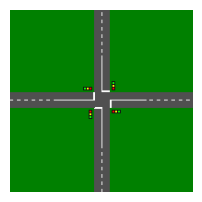

In [20]:
rec3T = TestTrafficLight(30)

MovieWriter imagemagick unavailable; using Pillow instead.


..............................................................done


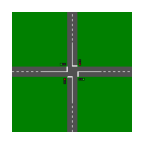

In [21]:
animate(rec3T, 'TrafficLightTest')

### Code Traffic Light Crossing

In [22]:
def TrafficLightCrossing(Tmax, 
                        VMAXmain=20, VMAXcross=15, 
                        loc=1, N_IATmain=4, S_IATmain = 4, IATcross=10,
                        NS=[40,10], EW=[20,10]):
           
    rec = Recorder(0, Tmax, 0.5)

    network = RoadNetwork("Traffic Light Crossing", 600, 600, rec)
    MSt = network.addRoad("Main St",  "MSt", NORTH_SOUTH, 0.4)
    CRd = network.addRoad("Cross Rd", "CRd", EAST_WEST, 0.6)
    RoadSegment(CRd, None, MSt)
    RoadSegment(CRd, MSt, None)
    RoadSegment(MSt, None, CRd)
    RoadSegment(MSt, CRd, None)
    
    intersection = network.getIntersection(MSt, CRd)
    TrafficLight(intersection, NS=NS, EW=EW)
    
    # displayMap(network)

    seeds = random.sample(range(1000), k=5)

    ## Generate Main Traffic
    random.seed(seeds[0])
    t = 0
    while t<Tmax:
        Δt = loc + random.expovariate(1/(S_IATmain-loc))
        vmax = VMAXmain
        t = round(t+Δt,2)
        v = Vehicle(rec, MSt, SOUTH, t0=t, v=vmax, vmax=vmax, 
                    color='black', plan=['Stop@CRd', 'X@CRd'])
        # v.traceAdjustVelocity = True

    random.seed(seeds[1])
    t = 0
    while t<Tmax:
        Δt = loc + random.expovariate(1/(N_IATmain-loc))
        vmax = VMAXmain
        t = round(t+Δt,2)
        v = Vehicle(rec, MSt, NORTH, t0=t, v=vmax, vmax=vmax, 
                    color='orange', plan=['Stop@CRd', 'X@CRd'])# v.traceEvents = True
        
    ## Generate Cross Traffic
    random.seed(seeds[2])
    t = 0
    while t<Tmax:
        Δt = loc + random.expovariate(1/(IATcross-loc))
        vmax = VMAXcross
        t = round(t+Δt,2)
        v = Vehicle(rec, CRd, EAST, t0=t, v=vmax, vmax=vmax, 
                    color='red', plan=['Stop@MSt', 'X@MSt'])
        # v.traceEvents = True
        # v.traceCrossing = True
        # v.traceInterrupt = True
        # v.traceAdjustVelocity = True
        # v.traceCruising = True

    random.seed(seeds[3])
    t = 0
    while t<Tmax:
        Δt = loc + random.expovariate(1/(IATcross-loc))
        vmax = VMAXcross
        t = round(t+Δt,2)
        v = Vehicle(rec, CRd, WEST, t0=t, v=vmax, vmax=vmax, 
                    color='blue', plan=['Stop@MSt', 'X@MSt'])
        # v.traceAdjustVelocity = True
        # v.traceBraking = True

    random.seed(seeds[4])
    rec.run()
        
    return rec

### Simulation Traffic Light Crossing

[TOC](#Table-of-Contents)

In [23]:
N_IATmain = 30
S_IATmain = 30
IATcross = 30
VMAXmain = 50/3.6
VMAXcross = 50/3.6
random.seed(100)
rec3 = TrafficLightCrossing(400, loc=2,
                            VMAXmain=VMAXmain, 
                            VMAXcross=VMAXcross, 
                            N_IATmain=N_IATmain, 
                            S_IATmain = S_IATmain,
                            IATcross=IATcross,
                            NS=[30,10], EW=[30,10])



### Visualisation Traffic Light Crossing

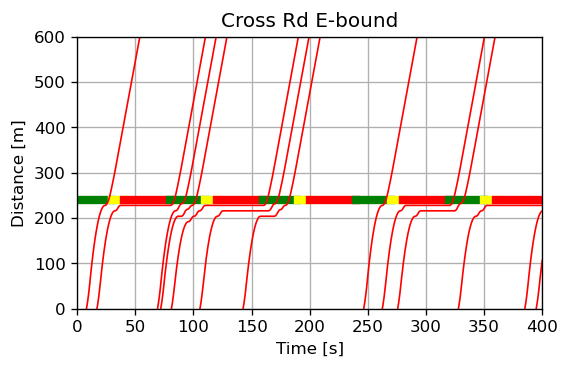

In [24]:
rec3.plot('t', 's', roads='Cross Rd', directions='EAST')

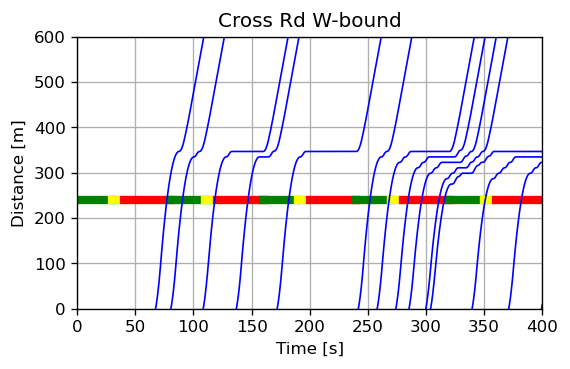

In [25]:
rec3.plot('t', 's', roads='Cross Rd', directions='WEST')

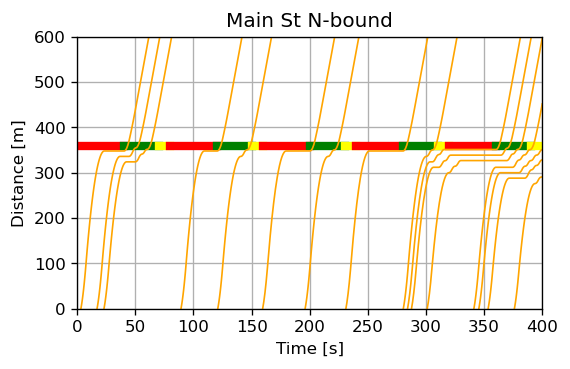

In [26]:
rec3.plot('t', 's', roads='Main St', directions='NORTH')

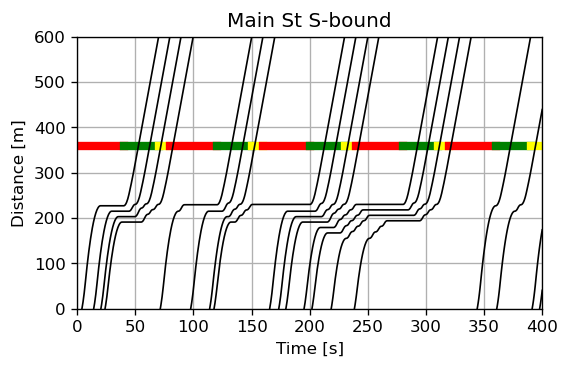

In [27]:
rec3.plot('t', 's', roads='Main St', directions='SOUTH')

**Beware:** Generating the animation for 300s simulation takes about 50 min, or 10s per second of animation time.

In [28]:
# animate(rec3, 'TrafficLight Animation', start_time=0, end_time=300)

### Statistics Traffic Light Crossing

[TOC](#Table-of-Contents)

#### Traffic Density in veh/km

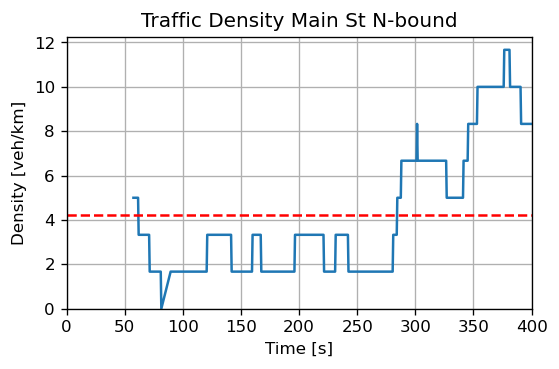

4.22

In [29]:
rec3.density(roads='Main St', directions='NORTH', plot=True)

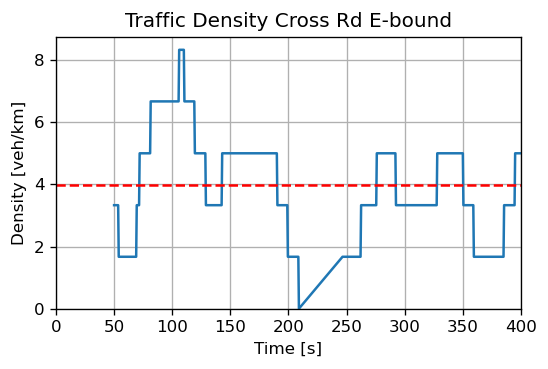

3.99

In [30]:
rec3.density(roads='Cross Rd', directions='EAST', plot=True)

#### Traffic Flow in veh/h

In [31]:
VL = rec3.network.VL
flowN = rec3.flow(roads='Main St', directions='NORTH')
expectedFlowN = 3600/N_IATmain
print(f"N-bound Flow: {flowN:6.1f}veh/h  "
      f"expected flow: {expectedFlowN:6.1f}veh/h ")
flowS = rec3.flow(roads='Main St', directions='SOUTH')
expectedFlowS = 3600/S_IATmain
print(f"S-bound Flow: {flowS:6.1f}veh/h  "
      f"expected flow: {expectedFlowS:6.1f}veh/h ")
flowE = rec3.flow(roads='Cross Rd', directions='EAST')
expectedFlowE = 3600/IATcross
print(f"E-bound Flow: {flowE:6.1f}veh/h  "
      f"expected flow: {expectedFlowE:6.1f}veh/h ")
flowW = rec3.flow(roads='Cross Rd', directions='WEST')
expectedFlowW = 3600/IATcross
print(f"W-bound Flow: {flowW:6.1f}veh/h  "
      f"expected flow: {expectedFlowW:6.1f}veh/h ")

N-bound Flow:  109.3veh/h  expected flow:  120.0veh/h 
S-bound Flow:  168.7veh/h  expected flow:  120.0veh/h 
E-bound Flow:  105.9veh/h  expected flow:  120.0veh/h 
W-bound Flow:  123.8veh/h  expected flow:  120.0veh/h 


#### Average Travelling Time in s

In [32]:
rec3.avgTravelTime(roads='Main St')

77.75

In [33]:
rec3.avgTravelTime(roads='Cross Rd')

73.42

#### Average Speed in km/h

In [34]:
rec3.avgSpeed(roads='Main St')

27.78

In [35]:
rec3.avgSpeed(roads='Cross Rd')

29.42

#### Average and Maximum Wait Time in s

There is no wait time to be expected on the main road:

In [36]:
rec3.avgWaitTime(roads='Main St')

31.08

In [37]:
rec3.maxWaitTime(roads='Main St')

74.31

In [38]:
rec3.avgWaitTime(roads='Cross Rd', directions='EAST')

30.83

In [39]:
rec3.maxWaitTime(roads='Cross Rd')

78.46

#### Maximum Queue Length

In [40]:
rec3.maxQueueLength(roads='Main St')

6

In [41]:
rec3.maxQueueLength(roads='Cross Rd', directions='EAST')

3

## Traffic Simulation

In [59]:
trafficSimulation_df = []
trafficSimulation_df = pd.DataFrame(columns=['Counter', 'TrafficSituation',
                                             'VMainStreet', 'VLocalRoad', 
                                             'N_IATMain', 'S_IATMain', 'IATCross', 
                                             'N_ActualFlow', 'N_EstimatedFlow',
                                             'S_ActualFlow', 'S_EstimatedFlow', 
                                             'E_ActualFlow', 'E_EstimatedFlow', 
                                             'W_ActualFlow', 'W_EstimatedFlow', 
                                             'N_Density', 'S_Density', 'E_Density', 'W_Density',
                                             'TrafficFlow_MainStreet', 'TrafficFlow_CrossRoad', 
                                             'Main_MaxWaitTime', 'Cross_MaxWaitTime',
                                             'Main_AvgWaitTime', 'Cross_AvgWaitTime', 
                                             'Main_MaxQueue', 'Cross_MaxQueue',
                                             'Main_AvgTravelTime', 'Cross_AvgTravelTime',
                                             'Main_Green', 'Main_Yellow', 
                                             'Cross_Green', 'Cross_Yellow' ])

In [60]:
# Varying traffic light timings for main street and local/ cross raod on baseline simulation situation

vCrossRoad = 13.33 # Speed from speedVariations_df of Baseline Simulation
N_IATmain = 18 # traffic flow northbound 200 vehicles/hour
S_IATmain = 12 # traffic flow southbound 300 vehicles/hour
IATcross = 18  # traffic flow cross-road 200 vehicles/hour
VMAXmain = 65/3.6 # main road speed of 65km/h.
yellowLight = 10
cnt = 1

for mainGreen in range(25, 45):
    for localGreen in range(10, 15):
        random.seed(100)
        
        situation = "TrafSit_" + str(cnt)        
        
        rec_Obj = TrafficLightCrossing(400, loc=2,
                            VMAXmain=VMAXmain, 
                            VMAXcross=vCrossRoad, 
                            N_IATmain=N_IATmain, 
                            S_IATmain = S_IATmain,
                            IATcross=IATcross,
                            NS=[mainGreen,yellowLight], EW=[localGreen,yellowLight])
        trafficSimulation_df = trafficSimulation_df.append({"Counter" : cnt, "TrafficSituation": situation,
                                                            "VMainStreet" : VMAXmain, "VLocalRoad" : vCrossRoad,
                                                            "N_IATMain" : N_IATmain, "S_IATMain" : S_IATmain,  "IATCross" : IATcross, 
                                                            "N_ActualFlow" : rec_Obj.flow(roads='Main St', directions='NORTH'), 
                                                            "N_EstimatedFlow" : 3600/N_IATmain,
                                                            "S_ActualFlow" : rec_Obj.flow(roads='Main St', directions='SOUTH'), 
                                                            "S_EstimatedFlow" : 3600/S_IATmain,
                                                            "E_ActualFlow" : rec_Obj.flow(roads='Cross Rd', directions='EAST'),
                                                            "E_EstimatedFlow" : 3600/IATcross, 
                                                            "W_ActualFlow" : rec_Obj.flow(roads='Cross Rd', directions='WEST'),
                                                            "W_EstimatedFlow" : 3600/IATcross, 
                                                            "N_Density" : rec_Obj.density(roads='Main St', directions='NORTH'),
                                                            "S_Density" : rec_Obj.density(roads='Main St', directions='SOUTH'),
                                                            "E_Density" : rec_Obj.density(roads='Cross Rd', directions='EAST'),
                                                            "W_Density" : rec_Obj.density(roads='Cross Rd', directions='WEST'),
                                                            "TrafficFlow_MainStreet" : (rec_Obj.flow(roads='Main St', directions='NORTH')) + (rec_Obj.flow(roads='Main St', directions='SOUTH')),
                                                            "TrafficFlow_CrossRoad" : (rec_Obj.flow(roads='Cross Rd', directions='EAST') + rec_Obj.flow(roads='Cross Rd', directions='WEST')), 
                                                            "Main_MaxWaitTime" : rec_Obj.maxWaitTime(roads='Main St'), 
                                                            "Cross_MaxWaitTime" : rec_Obj.maxWaitTime(roads='Cross Rd'),
                                                            "Main_AvgWaitTime" : rec_Obj.avgWaitTime(roads='Main St'),
                                                            "Cross_AvgWaitTime" : rec_Obj.avgWaitTime(roads='Cross Rd'),
                                                            "Main_MaxQueue" : rec_Obj.maxQueueLength(roads='Main St'),
                                                            "Cross_MaxQueue" : rec_Obj.maxQueueLength(roads='Cross Rd'), 
                                                            "Main_AvgTravelTime" : rec_Obj.avgTravelTime(roads='Main St'), 
                                                            "Cross_AvgTravelTime": rec_Obj.avgTravelTime(roads='Cross Rd'), 
                                                            "Main_Green": mainGreen,
                                                            "Main_Yellow": yellowLight,
                                                            "Cross_Green":localGreen,
                                                            "Cross_Yellow": yellowLight
                                                   }, ignore_index=True)
        cnt+=1

In [61]:
# trafficSimulation_df

,Counter,TrafficSituation,VMainStreet,VLocalRoad,N_IATMain,S_IATMain,IATCross,N_ActualFlow,N_EstimatedFlow,S_ActualFlow,...,Main_AvgWaitTime,Cross_AvgWaitTime,Main_MaxQueue,Cross_MaxQueue,Main_AvgTravelTime,Cross_AvgTravelTime,Main_Green,Main_Yellow,Cross_Green,Cross_Yellow
0,1,TrafSit_1,18.055556,13.33,18,12,18,135.89,200.0,216.18,...,20.64,23.97,12,5,56.63,72.47,25,10,10,10
1,2,TrafSit_2,18.055556,13.33,18,12,18,130.94,200.0,481.57,...,21.94,24.64,12,5,52.56,73.14,25,10,11,10
2,3,TrafSit_3,18.055556,13.33,18,12,18,133.37,200.0,481.57,...,21.14,24.64,12,5,51.89,73.14,26,10,10,10
3,4,TrafSit_4,18.055556,13.33,18,12,18,193.62,200.0,481.57,...,17.03,25.31,12,5,46.79,65.68,26,10,11,10


In [62]:
# Saving the DF in a CSV file to analyze later
trafficSimulation_df.to_csv('trafficSimulation_MSO_CA.csv', index=False)